## Titanic Dataset Prediction

Project by: Akshat Johari  
12 Aug 2023

Data Source: [Kaggle](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

In [293]:
# Importing libraries 

import pandas as pd
import numpy as np

import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier

import warnings
warnings.filterwarnings('ignore')

### Reading in data and basic exploration

**Dataset description**     

| Column Name | Description |
|---|---|
| PassengerId | Passenger ID |
|Survived| Whether or not the passenger survived |
|Pclass|Ticket class  <ul><li>1: 1st </li><li> 2: 2nd</li> <li>3 : 3rd </li></ul>|
| Name | Name of the passenger |
| Sex | Gender |
| Age | Age in years |
| SibSp | Number of siblings/spouses aboard the Titanic |
| Parch | Number of parents/chidren aboard the Titanic |
| Ticket | Ticket Number |
| Fare | Passenger Fare |
| Cabin | Cabin Number |
| Embarked | Port of origin for passenger |

In [5]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
df.shape

(891, 12)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploratory Data Analysis

In [20]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

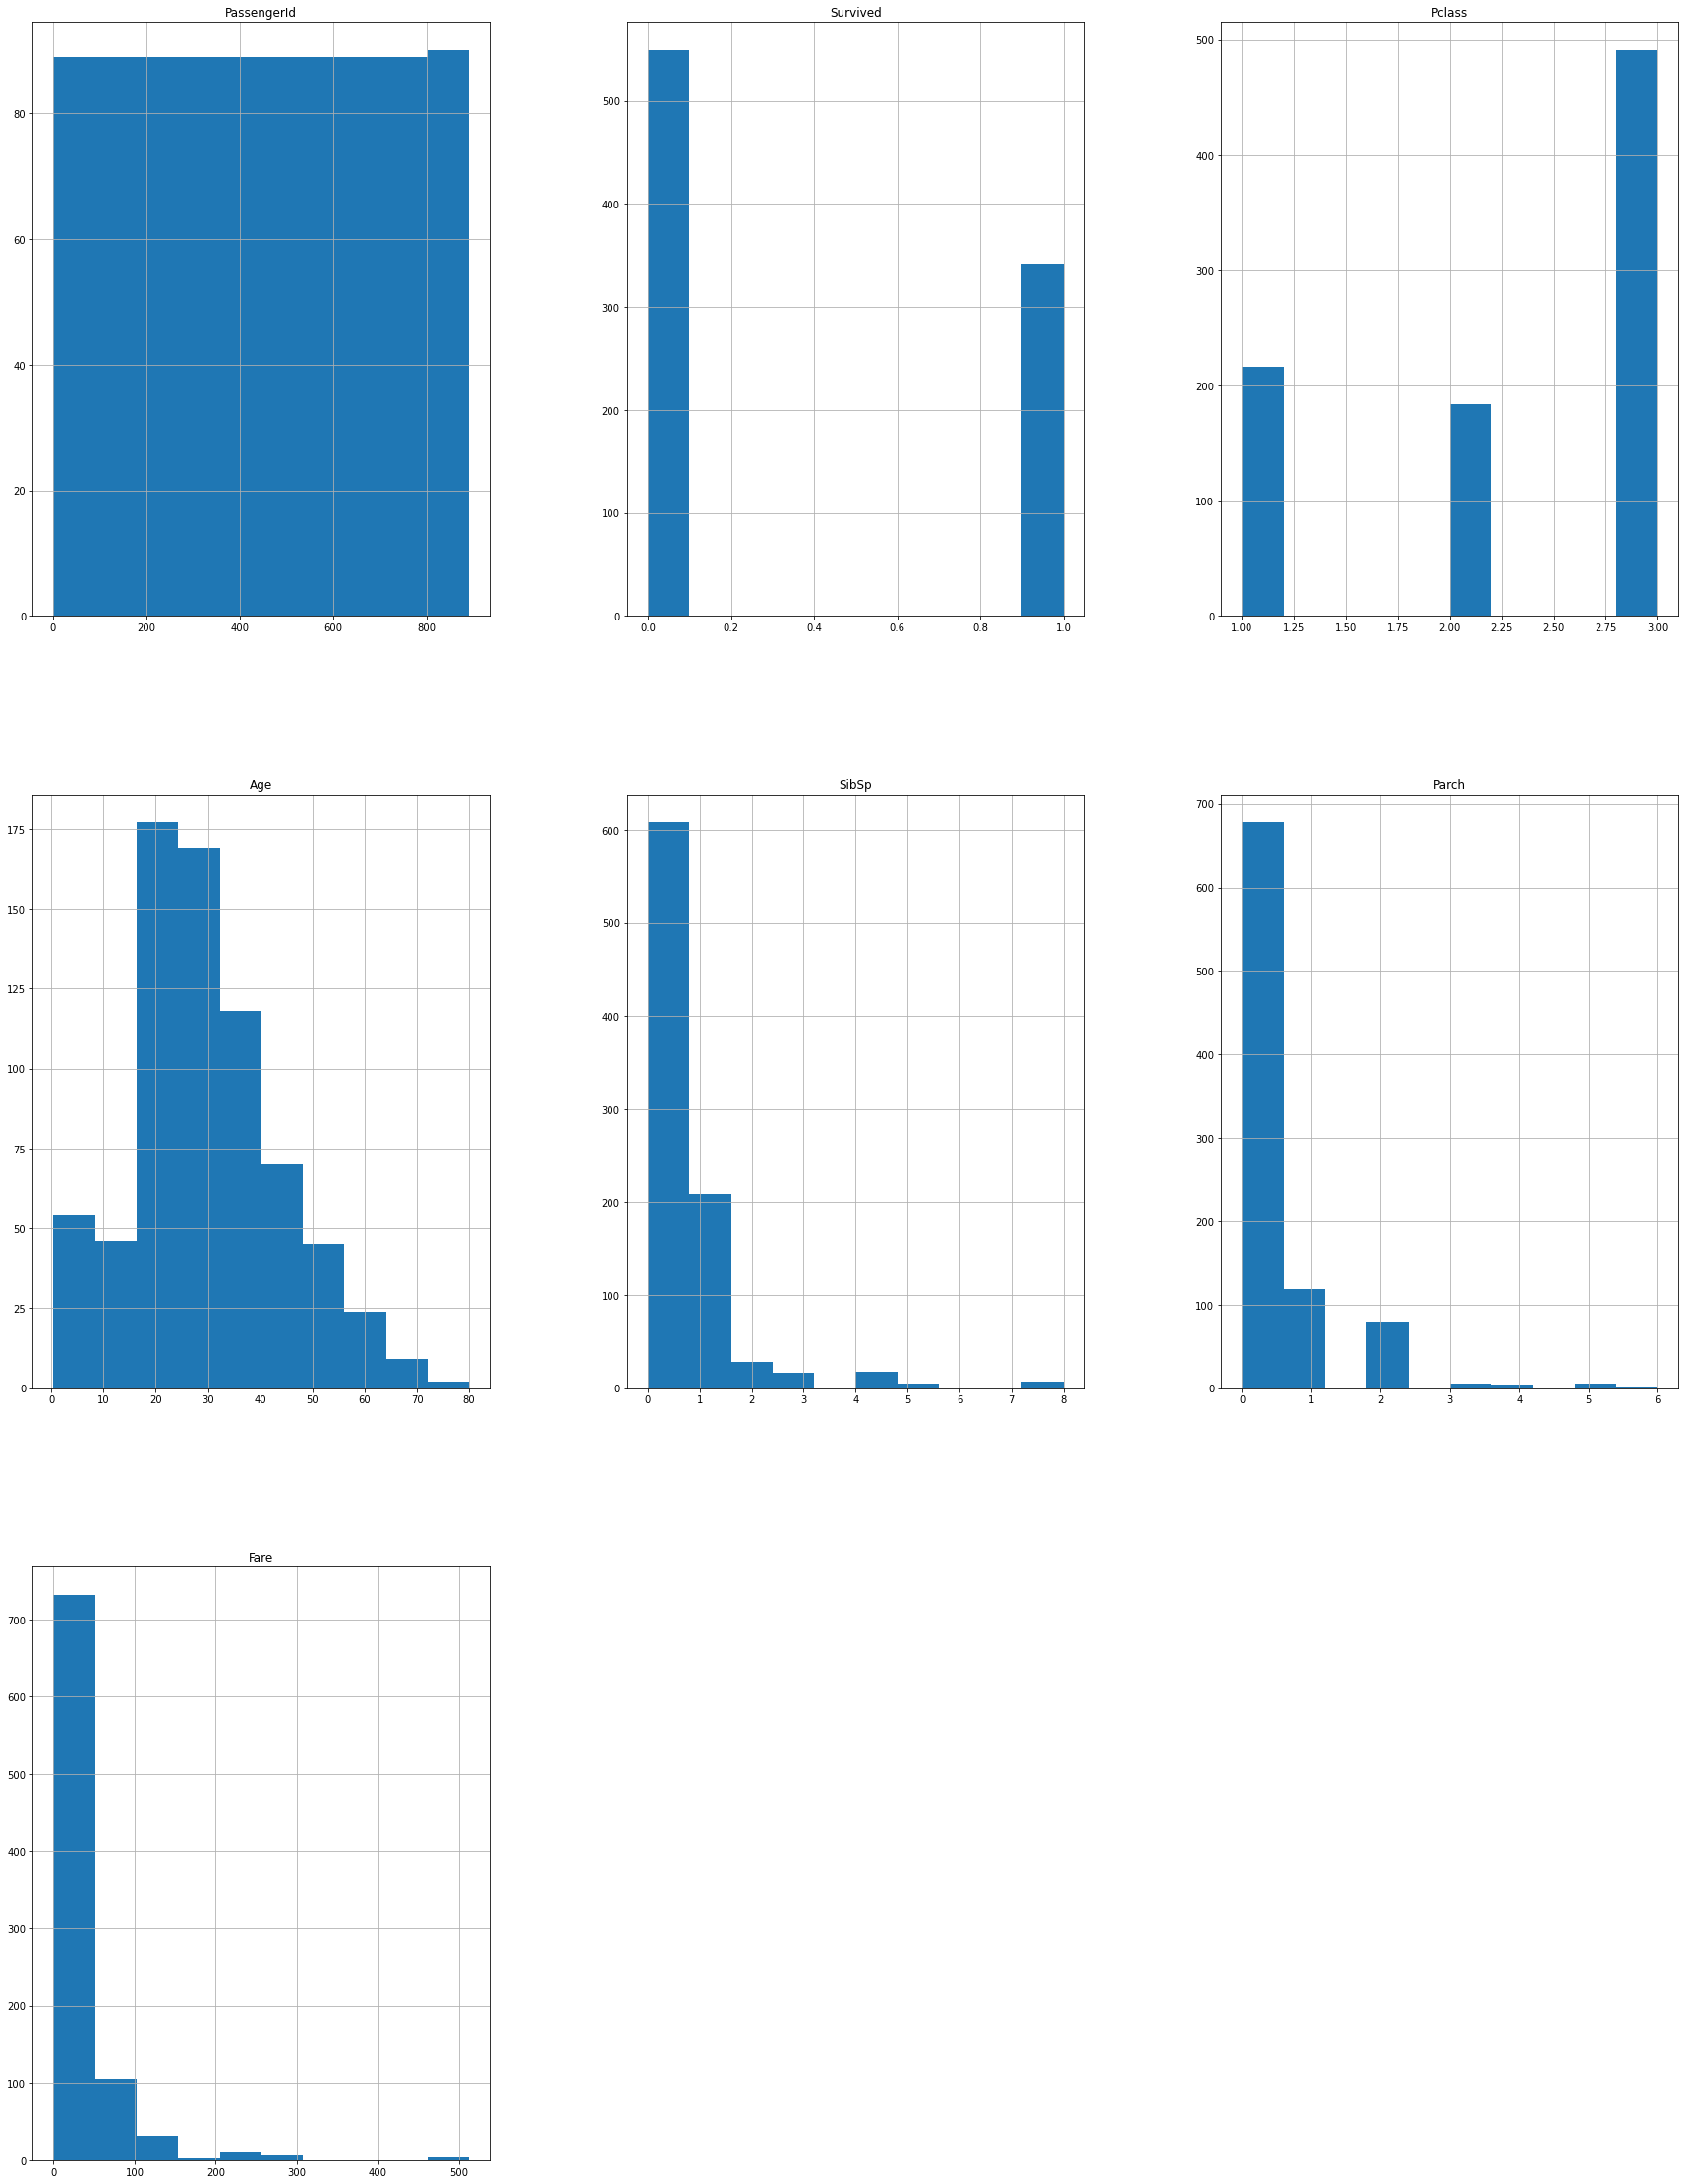

In [19]:
df.hist(figsize = [30, 40]);

In [24]:
print('Percentage of missing values by column')
round(df.isnull().sum() * 100/ df.shape[0], 2)

Percentage of missing values by column


PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Investigating missing values   
Age has ~20% missing values, cabin ~80% and embarked 0.2%


In [27]:
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
D              3
              ..
E49            1
A10            1
D9             1
E12            1
D47            1
Name: Cabin, Length: 147, dtype: int64

Cabin is a categorical variable with 147 unique values and 77% missing entries. We will ignore this variable in our modeling.

In [26]:
df[df['Age'].isnull()]

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
5      male  NaN      0      0      330877   8.4583   NaN        Q  
17     male  NaN      0      0      244373  13.0000   NaN        S  
19   female  NaN      0      0        2649   7.2250   NaN        C  
26     male  NaN      0      0        2631   7.2250   NaN        C  
28   female  NaN      0      0      330959   7.8792   NaN        Q  
..      ...  ...    ...    ...         ...      ...   ...      ...  
859    male  NaN      0      0        2629   7.2292   NaN        C  
863  female  NaN      8      2    CA. 2343  69.5500   NaN        S  
868    male  NaN      0      0      345777   9.5000   NaN        S  
878    male  NaN      0      0      349217   7.8958   NaN        S  
888  female  NaN      1      2  W./C. 6607  23.4500   NaN        S  

[177 rows x 12 columns]

In [33]:
age_df = df[df['Age'].isnull()][['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
age_df

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
5           0       3    male      0      0   8.4583        Q
17          1       2    male      0      0  13.0000        S
19          1       3  female      0      0   7.2250        C
26          0       3    male      0      0   7.2250        C
28          1       3  female      0      0   7.8792        Q
..        ...     ...     ...    ...    ...      ...      ...
859         0       3    male      0      0   7.2292        C
863         0       3  female      8      2  69.5500        S
868         0       3    male      0      0   9.5000        S
878         0       3    male      0      0   7.8958        S
888         0       3  female      1      2  23.4500        S

[177 rows x 7 columns]

In [41]:
for var in age_df.columns:
    print(f"\n{var}:\n{age_df[var].value_counts()}")


Survived:
0    125
1     52
Name: Survived, dtype: int64

Pclass:
3    136
1     30
2     11
Name: Pclass, dtype: int64

Sex:
male      124
female     53
Name: Sex, dtype: int64

SibSp:
0    137
1     26
8      7
3      4
2      3
Name: SibSp, dtype: int64

Parch:
0    157
2     12
1      8
Name: Parch, dtype: int64

Fare:
7.7500     20
7.8958     15
8.0500     14
0.0000      8
69.5500     7
           ..
26.0000     1
82.1708     1
13.0000     1
30.0000     1
14.4542     1
Name: Fare, Length: 73, dtype: int64

Embarked:
S    90
Q    49
C    38
Name: Embarked, dtype: int64


In [77]:
a = age_df.groupby(['Pclass', 'Sex']).size().reset_index().rename(columns = {0:'Count'})
a = pd.pivot_table(data = a, index = ['Pclass'], columns = ['Sex'], values = 'Count')
a

Sex     female  male
Pclass              
1            9    21
2            2     9
3           42    94

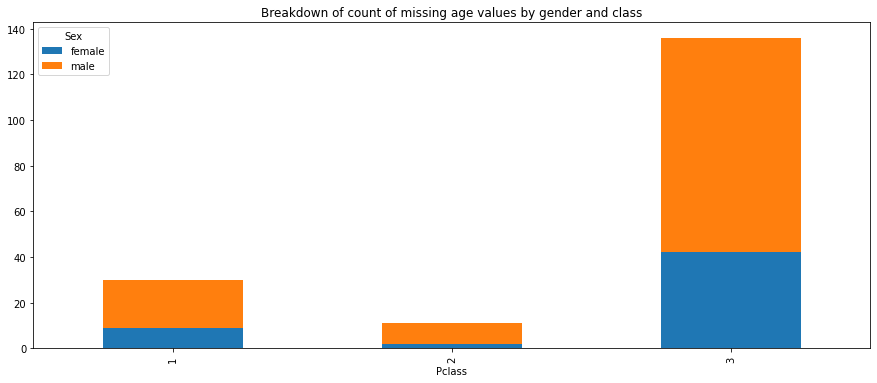

In [94]:
ax = a.plot.bar(stacked = True, figsize = [15,6])
ax.set_title('Breakdown of count of missing age values by gender and class')
plt.show()

Replacing missing values of age with the median for the class and sex

In [95]:
age_replace = pd.pivot_table(data = df[['Age', 'Pclass', 'Sex']], 
               index = ['Pclass', 'Sex'], 
               dropna = True, 
               aggfunc = np.median).reset_index()dd
age_replace

Pclass     Sex   Age
0       1  female  35.0
1       1    male  40.0
2       2  female  28.0
3       2    male  30.0
4       3  female  21.5
5       3    male  25.0

In [139]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [142]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [143]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.5      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

## Visualization and Plots

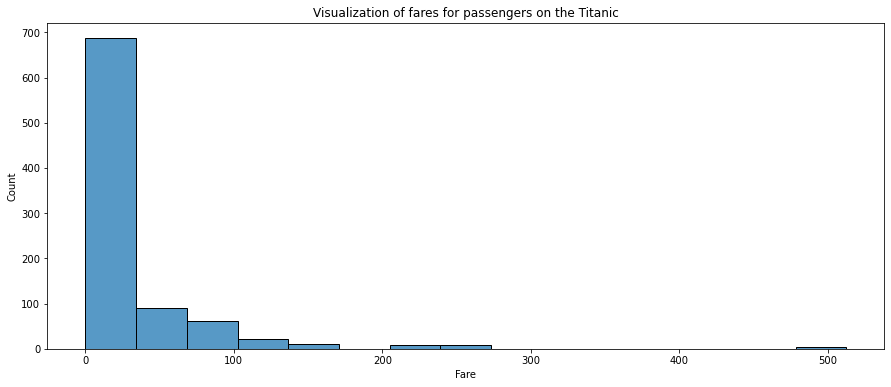

In [155]:
plt.figure(figsize = [15,6])
sns.histplot(data = df, x = 'Fare', bins = 15)
plt.title('Visualization of fares for passengers on the Titanic')
plt.show()

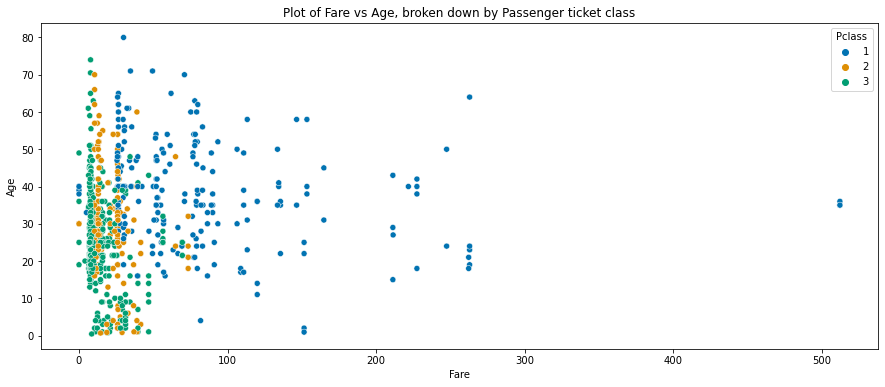

In [164]:
plt.figure(figsize = [15,6])
sns.scatterplot(data = df, x = 'Fare', y = 'Age', hue = 'Pclass', palette = 'colorblind')
plt.title('Plot of Fare vs Age, broken down by Passenger ticket class')
plt.show()

<Figure size 1080x432 with 0 Axes>

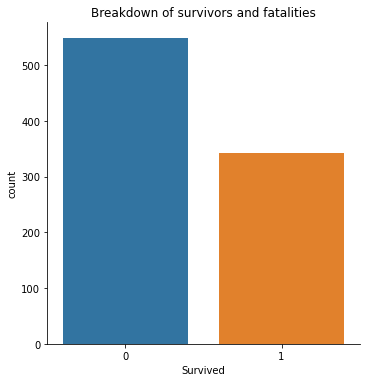

In [188]:
plt.figure(figsize = [15,6])
sns.catplot(data = df, x = 'Survived', kind = 'count')
plt.title('Breakdown of survivors and fatalities')
plt.show()

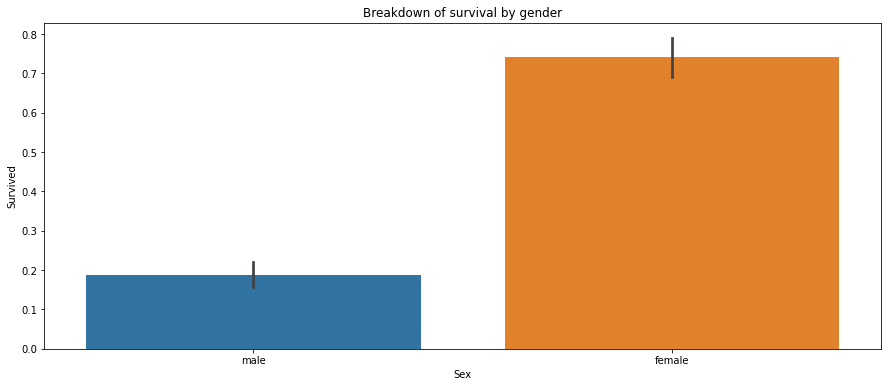

In [191]:
plt.figure(figsize = [15,6])
sns.barplot(data = df, x = 'Sex', y = 'Survived')
plt.title('Breakdown of survival by gender')
plt.show()

Looks like the old adge of *Women and children first* was followed on the Titanic!

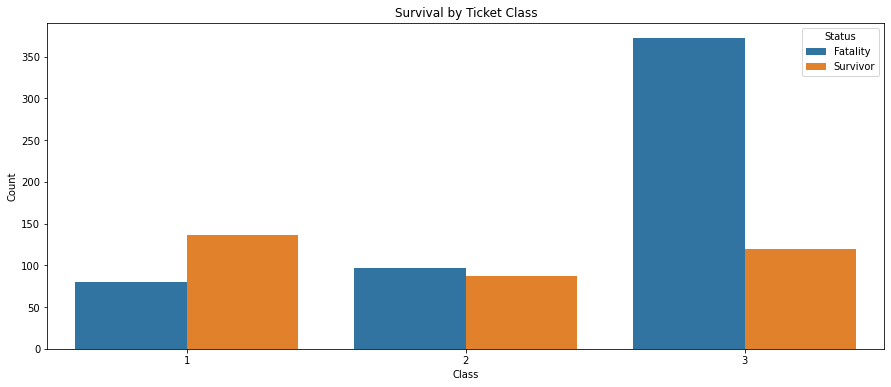

In [255]:
a = df[['Pclass', 'Survived']].value_counts().reset_index().\
sort_values(by = ['Pclass', 'Survived']).rename(columns = {0:'Count', 'Survived': 'Status'})

a['Status'] = a['Status'].apply(lambda x: 'Fatality' if x == 0 else 'Survivor')


plt.figure(figsize = [15,6])
sns.barplot(data = a, x = 'Pclass', y = 'Count', hue = 'Status')
plt.title('Survival by Ticket Class')
plt.xlabel('Class')
plt.show()

The largest proportion of deaths was in the third class - was the James Cameron movie accurate?

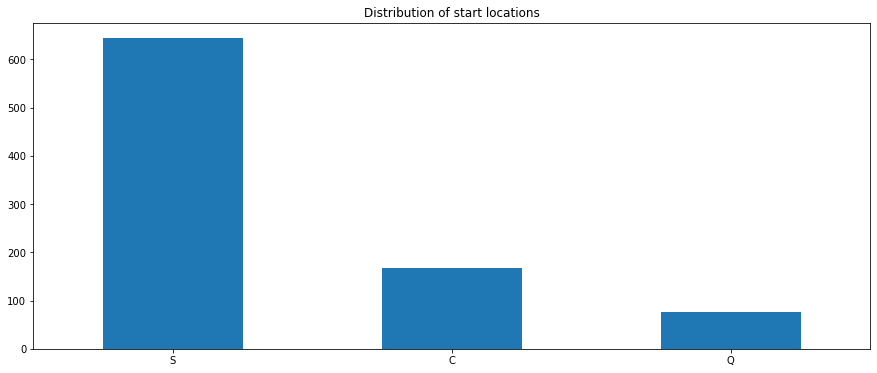

In [262]:
plt.figure(figsize = [15,6])
df['Embarked'].value_counts().plot(kind = 'bar', rot = 0)
plt.title('Distribution of start locations')
plt.show()

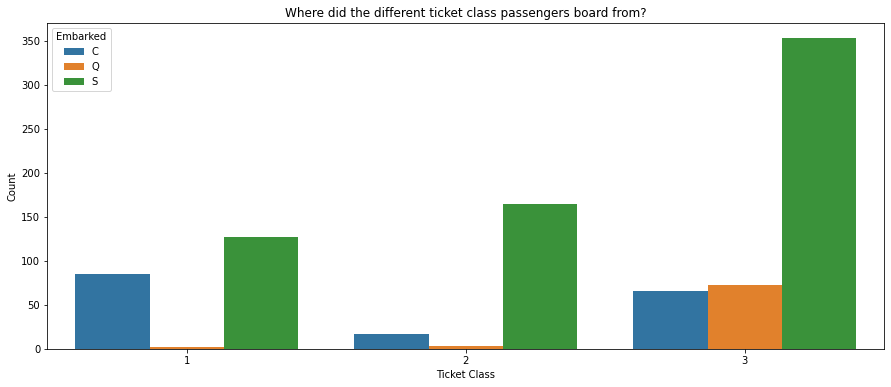

In [272]:
a = df[['Embarked', 'Pclass']].value_counts().reset_index().\
sort_values(by = ['Pclass', 'Embarked']).rename(columns = {0:'Count'})

plt.figure(figsize = [15,6])
sns.barplot(data = a, x = 'Pclass', y = 'Count', hue = 'Embarked')
plt.title('Where did the different ticket class passengers board from?')
plt.xlabel('Ticket Class')
plt.show()

Most passengers boarded from the origin - Southampton, in England. The largest proportion of ticket holders boarding from all three locations were third class passengers.  
Cherbourg, France was where the largest number of first class passengers boarded. Queenstown in Ireland had the smallest number of passengers embarking on their doomed voyage.

### Correlation and Machine Learning

In [274]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

One final look at the dataframe before we create the training and testing data

In [275]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Dropping variables: 
* PassengerId
* Name
* Ticket
* Cabin

In [278]:
y = df['Survived']
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Dummy encoding categorical columns
X = pd.get_dummies(data = X, columns = ['Sex', 'Embarked', 'Pclass'])
X

Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0    22.0      1      0   7.2500           0         1           0   
1    38.0      1      0  71.2833           1         0           1   
2    26.0      0      0   7.9250           1         0           0   
3    35.0      1      0  53.1000           1         0           0   
4    35.0      0      0   8.0500           0         1           0   
..    ...    ...    ...      ...         ...       ...         ...   
886  27.0      0      0  13.0000           0         1           0   
887  19.0      0      0  30.0000           1         0           0   
888  21.5      1      2  23.4500           1         0           0   
889  26.0      0      0  30.0000           0         1           1   
890  32.0      0      0   7.7500           0         1           0   

     Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0             0           1         0         0         1  
1             0           0         1         0         0  
2             0           1         0         0         1  
3             0           1         1         0         0  
4             0           1         0         0         1  
..          ...         ...       ...       ...       ...  
886           0           1         0         1         0  
887           0           1         1         0         0  
888           0           1         0         0         1  
889           0           0         1         0         0  
890           1           0         0         0         1  

[891 rows x 12 columns]

Scaling data

In [302]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled

0      1         2         3    4    5    6    7    8    9    10  \
0    0.271174  0.125  0.000000  0.014151  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1    0.472229  0.125  0.000000  0.139136  1.0  0.0  1.0  0.0  0.0  1.0  0.0   
2    0.321438  0.000  0.000000  0.015469  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3    0.434531  0.125  0.000000  0.103644  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
4    0.434531  0.000  0.000000  0.015713  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
..        ...    ...       ...       ...  ...  ...  ...  ...  ...  ...  ...   
886  0.334004  0.000  0.000000  0.025374  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
887  0.233476  0.000  0.000000  0.058556  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
888  0.264891  0.125  0.333333  0.045771  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
889  0.321438  0.000  0.000000  0.058556  0.0  1.0  1.0  0.0  0.0  1.0  0.0   
890  0.396833  0.000  0.000000  0.015127  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

      11  
0    1.0  
1    0.0  
2    1.0  
3    0.0  
4    1.0  
..   ...  
886  0.0  
887  0.0  
888  1.0  
889  0.0  
890  1.0  

[891 rows x 12 columns]

In [295]:
# Splitting the data into 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [296]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((668, 12), (668,), (223, 12), (223,))

Models used:
* Logistic Regression
* Decision Trees
* Bagging with Decision Trees
* Bagging with Logistic Regression
* Random Forest
* AdaBoost
* Gradient Boost

In [316]:
models = ['LogisticRegression', 
          'DecisionTree', 
          'Bagging with Decision Tree', 
          'Bagging with Logistic Regression', 
          'RandomForest', 
          'GradientBoost', 
          'AdaBoost']

**Logistic Regression**

In [297]:
# Logistic Regression
clf_lr = LogisticRegression(random_state = 42)
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
acc_lr

0.8026905829596412

**Decision Tree**

In [298]:
# Decision Tree
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred)
acc_dt

0.726457399103139

**Bagging with Decision Tree**

In [299]:
# Bagging with Decision Tree
clf_bdt = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state = 42), \
                            n_estimators = 50, random_state = 42)
clf_bdt.fit(X_train, y_train)
y_pred = clf_bdt.predict(X_test)
acc_bdt = accuracy_score(y_test, y_pred)
acc_bdt

0.7892376681614349

**Bagging with Logistic Regression**

In [300]:
# Bagging with Logistic Regression
clf_blr = BaggingClassifier(base_estimator = LogisticRegression(random_state = 42), n_estimators = 50, random_state = 42)
clf_blr.fit(X_train, y_train)
y_pred = clf_blr.predict(X_test)
acc_blr = accuracy_score(y_test, y_pred)
acc_blr

0.7982062780269058

**Random Forest**

In [301]:
# Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 1000],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [x for x in range(4, 8)],
    'criterion': ['gini', 'entropy']
}
gs_rf = GridSearchCV(estimator = RandomForestClassifier(),
            param_grid = param_grid)

gs_rf.fit(X_train, y_train)
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 50}

In [309]:
clf_rf = RandomForestClassifier(criterion = gs_rf.best_params_['criterion'], 
                                max_depth = gs_rf.best_params_['max_depth'],
                               max_features = gs_rf.best_params_['max_features'],
                               n_estimators = gs_rf.best_params_['n_estimators'])
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred)
acc_rf

0.8161434977578476

**AdaBoost**

In [311]:
# AdaBoost classifer
clf_ab = AdaBoostClassifier()
gs_ab = GridSearchCV(clf_ab, {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]})
gs_ab.fit(X_train, y_train)
gs_ab.best_params_

{'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 42}

In [313]:
clf_ab = AdaBoostClassifier(n_estimators = gs_ab.best_params_['n_estimators'],
                           learning_rate = gs_ab.best_params_['learning_rate'],
                            random_state = 42)
clf_ab.fit(X_train, y_train)
y_pred = clf_ab.predict(X_test)
acc_ab = accuracy_score(y_test, y_pred)
acc_ab

0.8026905829596412

**Gradient Boosting**

In [314]:
# Grid Search for Gradient Boosting classifier
param_grid = {
    'n_estimators': [10, 100, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'subsample': [0.5, 0.7, 1]
}

gs_gb = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid)

gs_gb.fit(X_train, y_train)
gs_gb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}

In [315]:
clf_gb = GradientBoostingClassifier(learning_rate = gs_gb.best_params_['learning_rate'], 
                                    max_depth = gs_gb.best_params_['max_depth'], 
                                    n_estimators = gs_gb.best_params_['n_estimators'], 
                                    subsample = gs_gb.best_params_['subsample'], 
                                    random_state = 42)
clf_gb.fit(X_train, y_train)
y_pred = clf_gb.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred)
acc_gb

0.8116591928251121

In [317]:
results = pd.DataFrame({'Clssifier': models,
                      'Accuracy': [acc_lr, acc_dt, acc_bdt, acc_blr, acc_rf, acc_gb, acc_ab]})
results.sort_values(by = 'Accuracy', ascending = False)

Clssifier  Accuracy
4                      RandomForest  0.816143
5                     GradientBoost  0.811659
0                LogisticRegression  0.802691
6                          AdaBoost  0.802691
3  Bagging with Logistic Regression  0.798206
2        Bagging with Decision Tree  0.789238
1                      DecisionTree  0.726457

Random Forest is the best performing model, with parameters as follows:

In [320]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

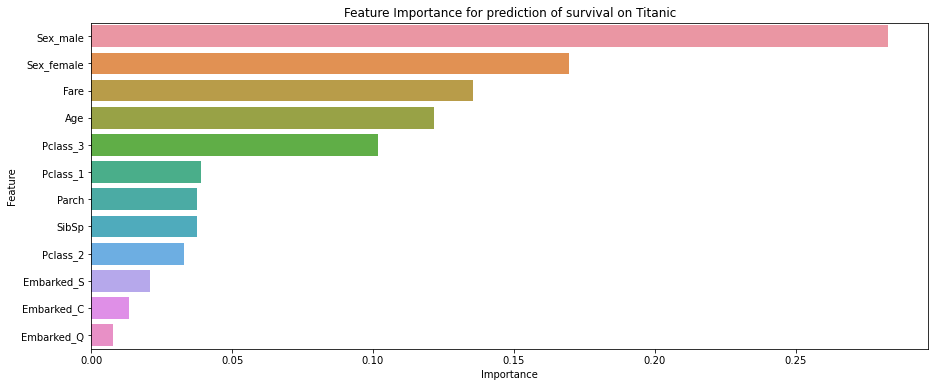

In [328]:
features = X.columns
importances = clf_rf.feature_importances_

featureImps = pd.DataFrame({'Feature': features, 'Importance': importances})

featureImps.sort_values(by = 'Importance', ascending = False, inplace = True)

plt.figure(figsize = [15,6])
plt.title('Feature Importance for prediction of survival on Titanic')
sns.barplot(data = featureImps, x = 'Importance', y = 'Feature', orient = 'h')
plt.show()

In [329]:
featureImps

Feature  Importance
5     Sex_male    0.282819
4   Sex_female    0.169475
3         Fare    0.135624
0          Age    0.121623
11    Pclass_3    0.101657
9     Pclass_1    0.038818
2        Parch    0.037710
1        SibSp    0.037631
10    Pclass_2    0.032811
8   Embarked_S    0.020688
6   Embarked_C    0.013252
7   Embarked_Q    0.007892

Indecreasing order of importance, the most important features to predict whether a passenger would survive their journey on the Titanic are:
* Gender (males were more likely to perish)
* Fare
* Age
* Whether or not they were in third class

Our final model is a random forest, which predicts survival with 81% accuracy.